In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uproot, hist
import pandas as pd
import awkward as ak
import os,sys,subprocess,glob
import mplhep as hep

sys.path.append("../scripts/")

from DQMIOReader import DQMIOReader 

Welcome to JupyROOT 6.28/06


In [4]:
MLP_EOS_path = "/eos/project/m/mlplayground/public/DQMIO/nanodqmio_from_das/"
path= "../testing/downloads/"
ZBfiles=glob.glob(MLP_EOS_path+'*.root')
HIfiles = glob.glob(path+'*.root')


In [13]:
ZBfiles[-5].rpartition('_')[-1]

'53A8BD7B-8DA0-4113-A262-C33D1C22AF9C.root'

In [ ]:
ZBfiles[-2].rpartition

In [29]:
HIreader = DQMIOReader(*HIfiles[-10:],sortindex=True)
ZBreader = DQMIOReader(*ZBfiles[-10:],sortindex=True)

DQMIOReader.__init__: opening 10 files...
all files opened, now making index
index made, now making list of monitoring elements
DQMIOReader.__init__: opening 10 files...
all files opened, now making index
index made, now making list of monitoring elements


In [30]:
print(len(ZBreader.listMEs()),len(HIreader.listMEs())
     )

4963 1622


In [31]:
sharedMEs=list(set(ZBreader.listMEs()) & set(HIreader.listMEs())) #intersection of the MEs in both dataset types

In [32]:
len(sharedMEs)

1491

In [33]:
[i for i in sharedMEs if 'charge' in i.lower()]

['PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1',
 'PixelPhase1/Tracks/charge_PXBarrel',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+2',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_2',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-2',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_4',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_3',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+3',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-1',
 'PixelPhase1/Tracks/charge_PXForward',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-3',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+1']

In [34]:
[i for i in ZBreader.listMEs() if 'charge' in i.lower()]

['PixelPhase1/Tracks/charge_PXBarrel',
 'PixelPhase1/Tracks/charge_PXForward',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_2',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_3',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_4',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+1',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+2',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+3',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-1',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-2',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-3']

In [35]:
[i for i in HIreader.listMEs() if 'charge' in i]

['PixelPhase1/Tracks/charge_PXBarrel',
 'PixelPhase1/Tracks/charge_PXForward',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_2',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_3',
 'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_4',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+1',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+2',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+3',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-1',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-2',
 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-3']

In [17]:
HIreader.getMEs('*charge_PXLayer_1*')

[MonitorElement(run=374925, lumi=1, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x113a6930>),
 MonitorElement(run=374925, lumi=2, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x113a0aa0>),
 MonitorElement(run=374925, lumi=3, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x11595f10>),
 MonitorElement(run=374925, lumi=4, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x115efb60>),
 MonitorElement(run=374925, lumi=5, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x115f01a0>),
 MonitorElement(run=374925, lumi=6, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x115f0810>),
 MonitorElement(run=374925, lumi=7, name='PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1', type=3, data=<cppyy.gbl.TH1F object at 0x115f0eb0>),
 Monit

In [40]:
### convert to dataframe
hname =  'PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1' 
# hname = 'PixelPhase1/Tracks/PXForward/charge_PXDisk_+1'
# hname= 'PixelPhase1/Tracks/PXForward/charge_PXDisk_-2'
HIdf = HIreader.getSingleMEsToDataFrame(hname)
ZBdf = ZBreader.getSingleMEsToDataFrame(hname)



In [60]:
ZBdf[ZBdf.loc[:,'fromrun'] == 373784]

,fromrun,fromlumi,hname,metype,histo,entries,Xmax,Xmin,Xbins,Ymax,Ymin,Ybins
1461,373784,1,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1462,373784,2,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1463,373784,3,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1464,373784,4,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1465,373784,5,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,373784,77,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1538,373784,78,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1539,373784,79,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1
1540,373784,80,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,80000.0,0.0,100,1.0,0.0,1


In [72]:
HIdf['histo_norm'] = HIdf.histo.transform(lambda x: x/sum(x) if sum(x) >0 else x)

ZBdf['histo_norm'] = ZBdf.histo.transform(lambda x: x/sum(x) if sum(x) >0 else x)

In [161]:
def make_plot(df,hname,runnb,norm=False,ax=None,flow=False,**style):
    df_reduced = df[(df.hname==hname) & (df.fromrun == runnb)].sort_values(by='fromlumi')
    if flow:
        bins =np.linspace(df_reduced.iloc[0].Xmin,df_reduced.iloc[0].Xmax,df_reduced.iloc[0].Xbins+3)
    else:
        bins =np.linspace(df_reduced.iloc[0].Xmin,df_reduced.iloc[0].Xmax,df_reduced.iloc[0].Xbins+1)
        
    if ax ==None:     
        fig,ax = plt.subplots(figsize=[10,5],dpi=150)
        
        
    if norm:
        for i in range(len(df_reduced.histo)):
            if flow:
                ax.stairs(df_reduced['histo_norm'].iloc[i],edges=bins,**style)
            else: 
                ax.stairs(df_reduced['histo_norm'].iloc[i][:-2],edges=bins,**style);
    else:         
        for i in range(len(df_reduced.histo)):
            if flow:
                ax.stairs(df_reduced.histo.iloc[i],edges=bins,**style);
            else:
                ax.stairs(df_reduced.histo.iloc[i][:-2],edges=bins,**style);
    return ax

In [157]:
HIdf.fromrun.unique(),ZBdf.fromrun.unique()

(array([374925]),
 array([373705, 373710, 373738, 373740, 373741, 373770, 373781, 373784]))

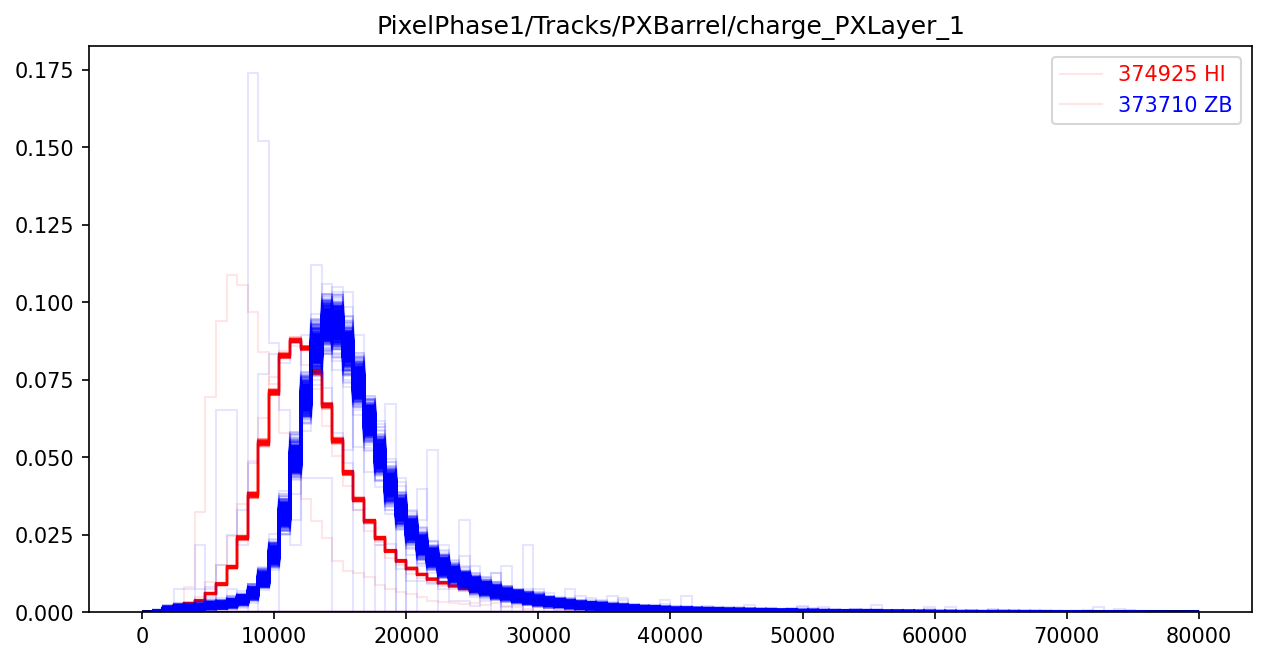

In [160]:
style = dict(alpha=.1,color='b')
fig,ax = plt.subplots(figsize=[10,5],dpi=150)

make_plot(HIdf,hname,374925,norm=True,
          ax=ax,flow=False,
          **{**style,'color':'r'}
         )

make_plot(ZBdf,hname,373710,norm=True,
          ax=ax,flow=False,
          **style
         )
ax.set_title(hname)
ax.legend(['374925 HI','373710 ZB'],labelcolor=['r','b'])
plt.show()

## Find the unique set of run numbers present in the eos area

In [ ]:
branch=file['Indices'].arrays()
branch.Run

In [ ]:
run_numbers=[]

for file in uproot.iterate(MLP_EOS_path+'*.root:Indices'):
    run_numbers.append(np.unique(file.Run.tolist())) # this will append unique numbers per iteration

unique_numbers = list(set(ak.ravel(run_numbers))) # this will return unique run numbers present in all files read

In [ ]:
ak.ravel(run_numbers)

In [ ]:
len(unique_numbers),sorted(unique_numbers)

Making this process into a function

In [ ]:
def find_run_numbers(path):
    #path = "/eos/project/m/mlplayground/public/DQMIO/nanodqmio_from_das/"
    files=os.listdir(path)
    run_numbers=[]

    for file in uproot.iterate(path+'*.root:Indices'):
        run_numbers.append(np.unique(file.Run.tolist())) # this will append unique numbers per iteration

    unique_numbers = list(set(ak.ravel(run_numbers))) # this will return unique run numbers present in all files read
    return unique_numbers

# open CSV

When opening from a csv file the `histo` column becomes a string for some reason.
The following functions are there to help with this case

In [281]:
def str2list(string):
    return np.array( map(int,string.strip('[]').split(', ')
                        )
                    )

def str2list_df(df):
    dfcp = df.copy()
    dfcp['histo'] = dfcp.histo.transform(str2list)
    return dfcp

# df = str2list_df(df)